- OpenClassrooms Project 5, Data Scientist
- Author : Oumeima EL GHARBI
- Date : September, October 2022

## Part II : Trying different Clustering Algorithms and Modelling

#### Importing libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%reset -f

from functions import *

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

import pickle

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [7]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

## I) RFM Clustering

#### Importing dataset

In [8]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [9]:
dataset_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


We had kept the customer id saved in the csv files, we drop it now.

In [10]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X.head()

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00


#### Standardisation : Scaling

In [11]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm.head()

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566


In [12]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


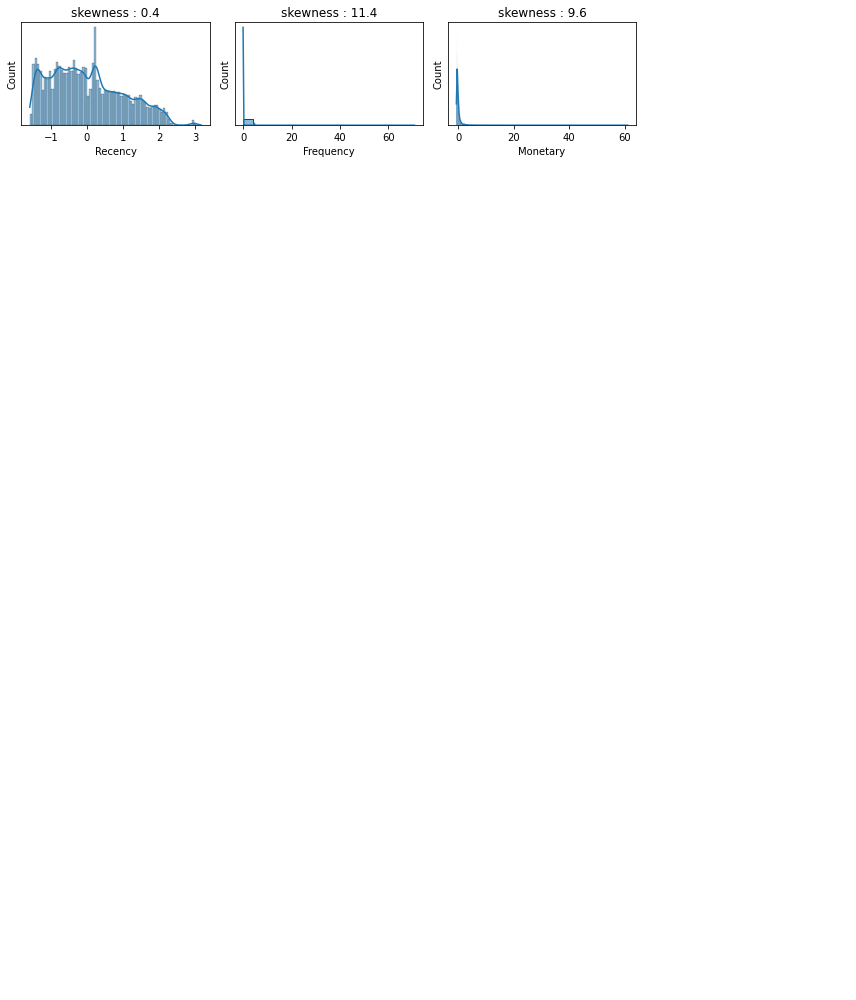

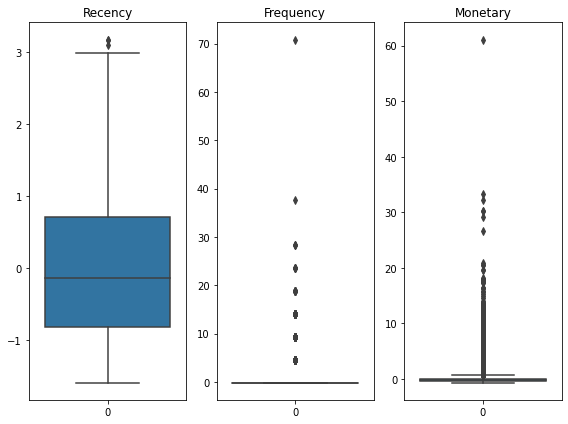

In [13]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation : Standard Scaler
We have tried to standardise the data using Scale or StandardScaler.
Since we do not have a train/test set, in this case these two methods are the same.

In [14]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std.head()

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566


In [15]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


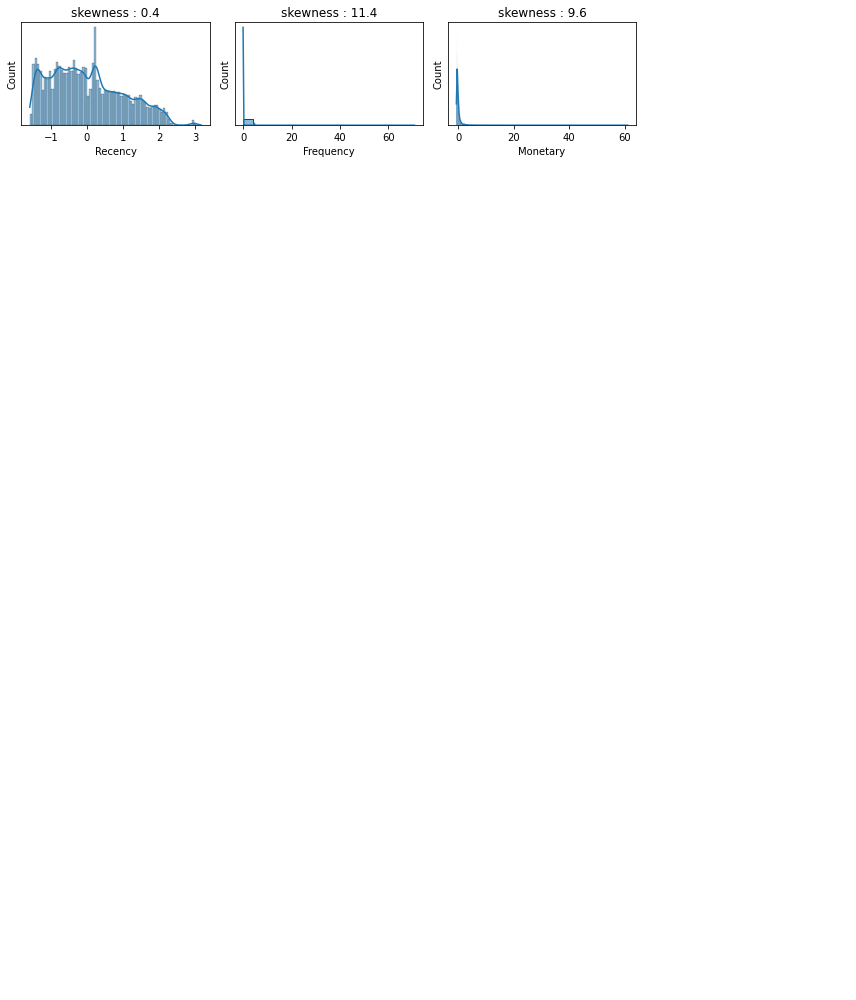

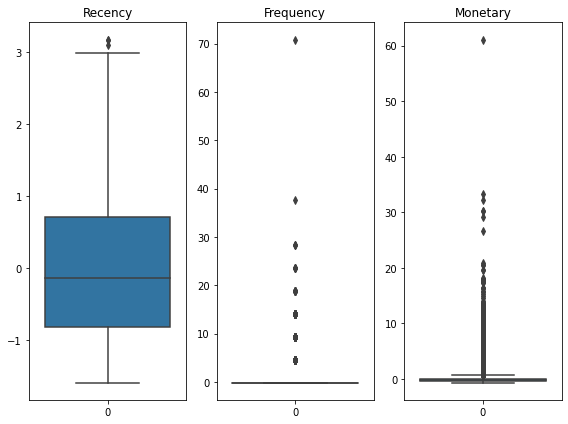

In [16]:
density_histplot(X_std)
display_boxplot(X_std)

##### Verifying that scale and std scaler are the same here

In [17]:
d = pd.concat([X_norm, X_std])
d.shape

(190840, 3)

In [18]:
d.drop_duplicates(keep=False)

,Recency,Frequency,Monetary


#### Creating a sample of the dataset

##### ATTENTION : we use only 5000 clients over 95000 for these some tryouts.
t-SNE, DBSCAN and Hierarchical Clustering cannot process too much data, so we use a reduced dataset for the tryouts.


In [19]:
X_norm_sample = X_norm.copy()
X_norm_sample = X_norm_sample.sample(n=5000, random_state=0, ignore_index=True) # we need to reset the index to get a box plot

X_norm_sample.shape

(5000, 3)

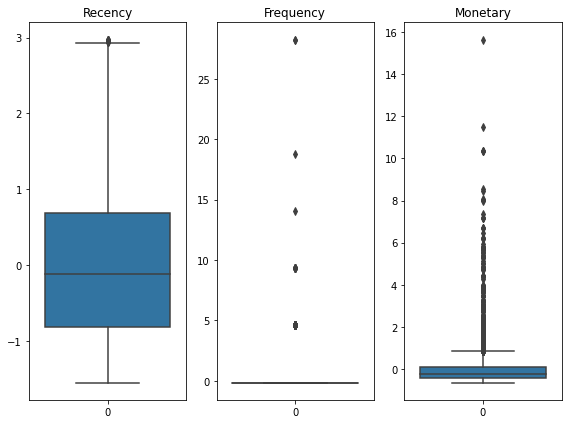

___Density distribution___


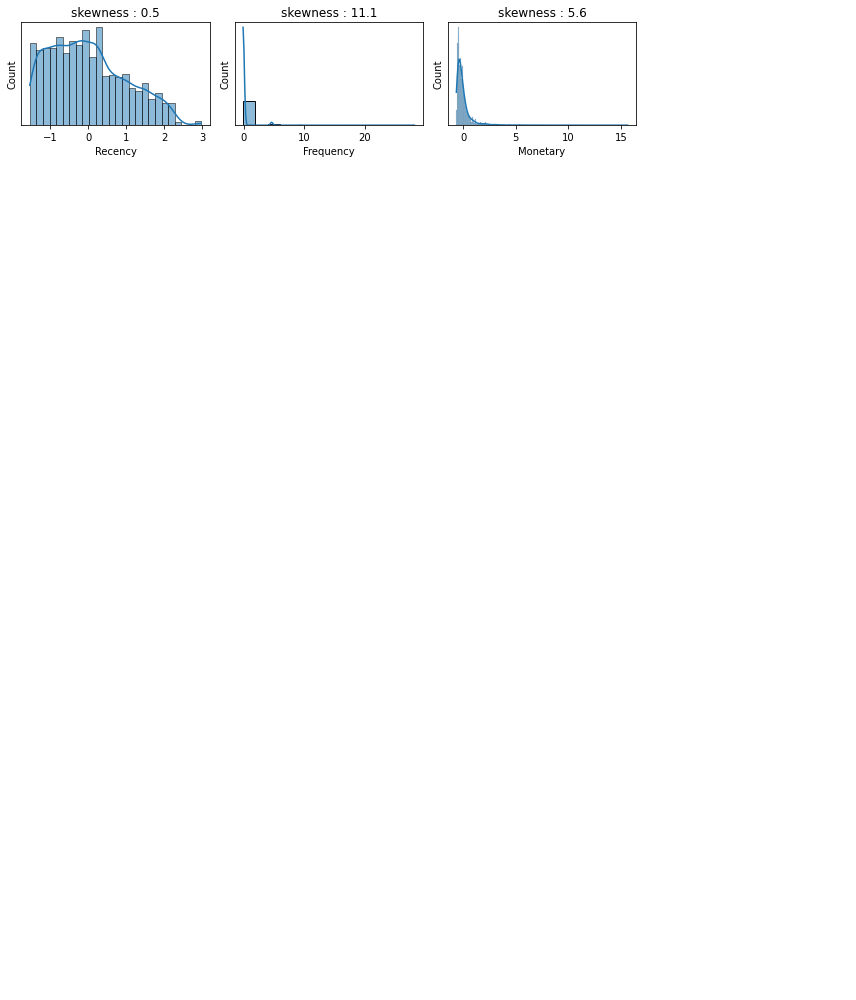

In [20]:
display_boxplot(X_norm_sample)
density_histplot(X_norm_sample)

#### PCA : Principal Component Analysis, global structure

In [21]:
pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

[0.36938074 0.70282884]


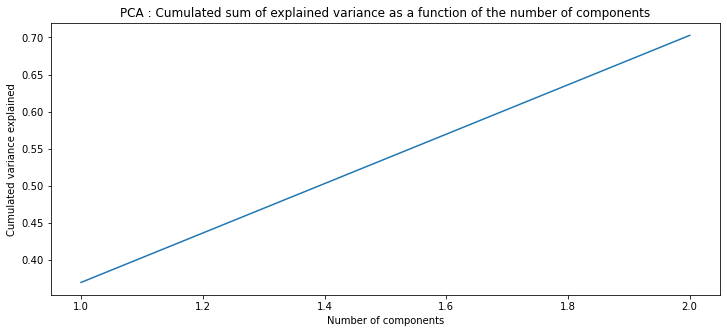

In [22]:
display_pca_variance_cumsum(pca_fitted=pca)

In [23]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

List of variance explained per component : [0.36938074 0.3334481 ]
Sum of the variance explained per component : 0.7028288419547449


In [24]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", round(pca.explained_variance_ratio_.cumsum()[1], 3) * 100, "% of the variance.")

The PCA with 2 components explains 70.3 % of the variance.


In [25]:
#X_pca

##### Projection of PCA components in 2D

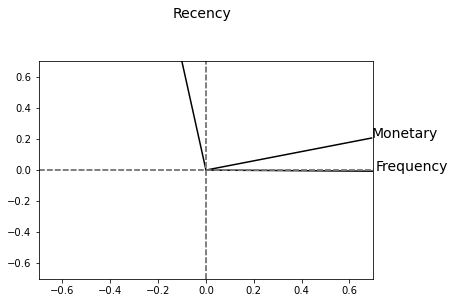

In [26]:
display_pca_components(pca_fit=pca, X_norm=X_norm)

##### Visualizing PCA components for the sample dataset

[0.41106477 0.73319995]


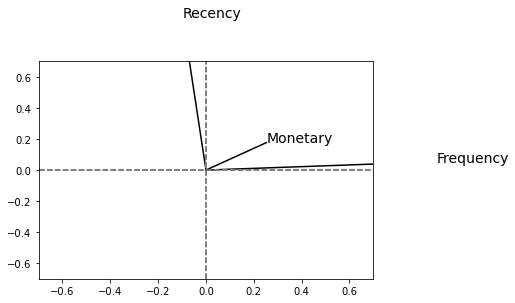

In [27]:
# sample :
pca_sample = PCA(n_components=2)
pca_sample.fit(X_norm_sample)
print(pca_sample.explained_variance_ratio_.cumsum())
X_pca_sample = pca_sample.transform(X_norm_sample)

display_pca_components(pca_fit=pca_sample, X_norm=X_norm_sample)

#### t-SNE : local structure

We tried to visualize the data using t-SNE, however in our case the fit takes too much time so we use t-SNE on our sample.

In [28]:
tsne_sample = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne_sample = tsne_sample.fit_transform(X_norm_sample)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### 1) Hierarchical clustering / HCA : Hierarchical Cluster Analysis

HCA takes too much time to run on all of the dataset so we use here the sample dataset.

##### Getting the best number of clusters automatically

In [29]:
hierarchical_cls_sample = AgglomerativeClustering().fit(X_norm_sample)

In [30]:
hierarchical_cls_sample.n_clusters

2

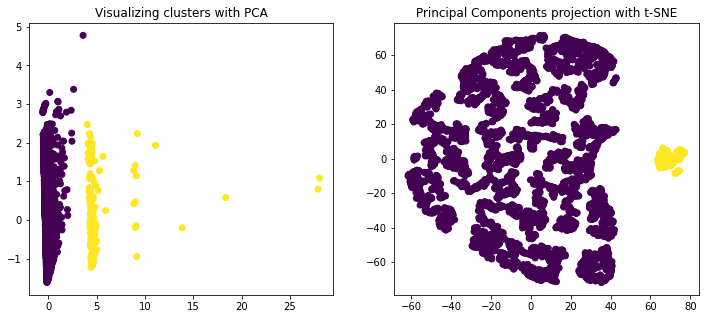

In [31]:
#hierarchical_cls_sample.labels_
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=hierarchical_cls_sample)

In [32]:
silhouette_score(X_norm_sample, hierarchical_cls_sample.labels_)

0.7404840374356035

##### Choosing the number of clusters

In [33]:
hierarchical_cls_sample_n = AgglomerativeClustering(n_clusters=5).fit(X_norm_sample)

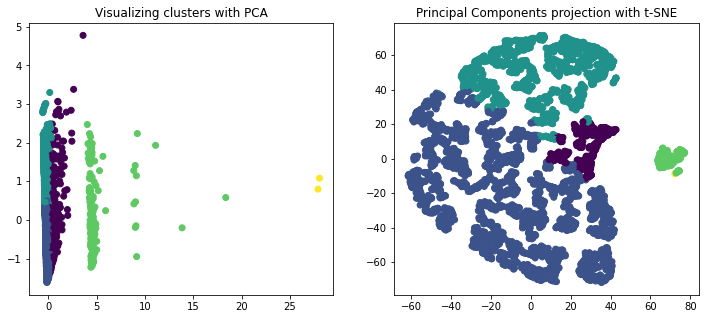

In [34]:
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=hierarchical_cls_sample_n)

In [35]:
silhouette_score(X_norm_sample, hierarchical_cls_sample_n.labels_)

0.4962690326790877

Conclusion : we won't use a HCA clsutering since the running time is too long.
We can only try it on a sample.

### 2) DBSCAN

**eps** (float, default=0.5)
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples** (int, default=5)
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [36]:
list_eps = [i / 2 for i in range(1, 7)]
list_eps

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

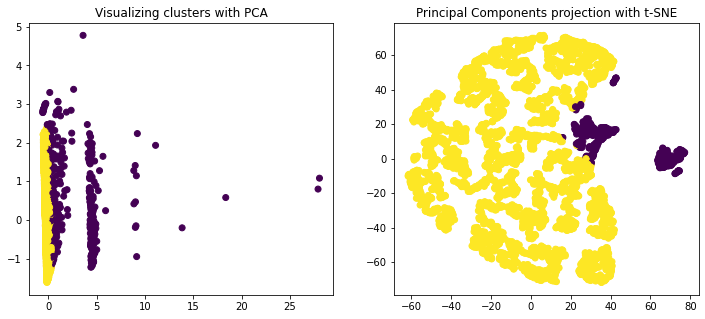

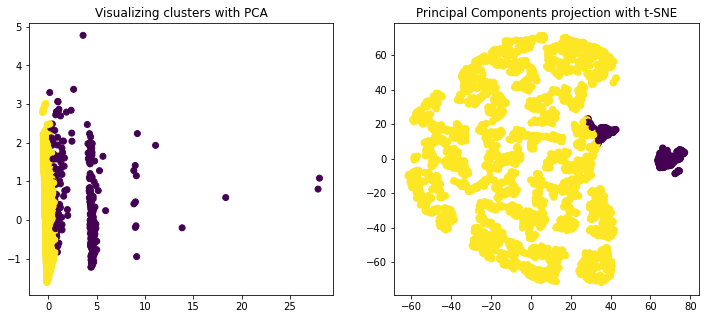

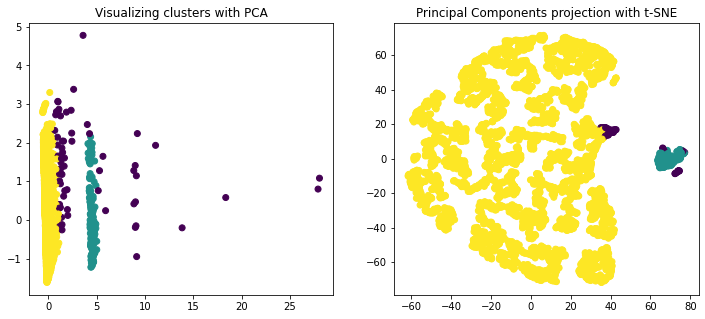

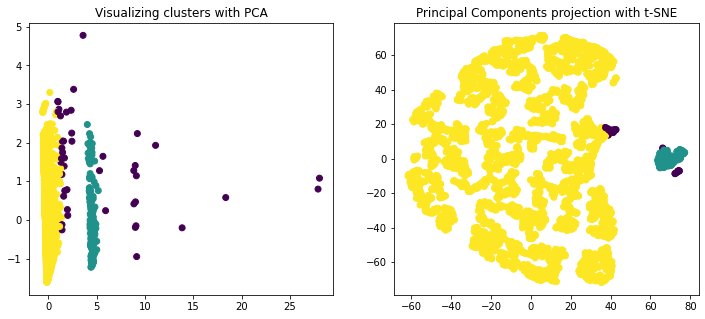

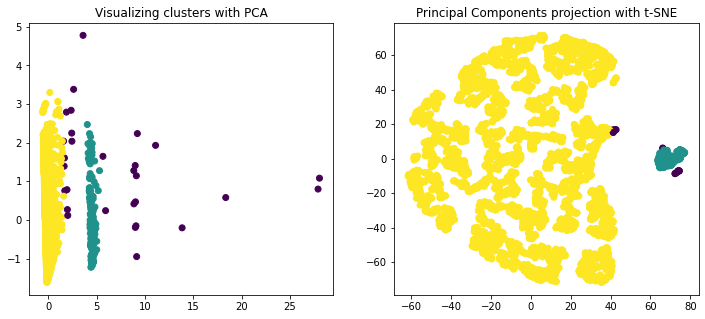

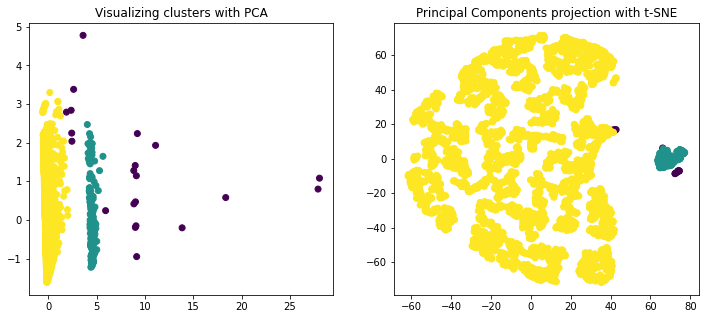

In [37]:
for eps in list_eps:
    print("Hyperparameter epsilon = ", eps)
    dbscan_cls_sample = DBSCAN(eps=eps, min_samples=100, n_jobs=-1).fit(X_norm_sample)
    display_pca_tsne(X_pca_sample, X_tsne_sample, cls=dbscan_cls_sample)

Conclusion : DBSCAN is a density based clustering algorithm. In our case, our clients are not connected by density.
Indeed, what differences the clients is the recency in majority (in our database, more than 97% of clients only ordered once).
Also, the runnin time is too long, so we won't use DBSCAN.


### 3) K-Means Clustering

#### 1) Using sample X_norm_sample

##### 1) First tryout

In [44]:
kmeans_cluster = KMeans(n_clusters=6, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm_sample)

# kmeans_cluster.labels_

KMeans(n_clusters=6, random_state=0)

In [45]:
kmeans_cluster.inertia_

3072.937906034521

In [46]:
silh = silhouette_score(X_norm_sample, kmeans_cluster.labels_)
silh

0.43306613133919475

##### Visualizing

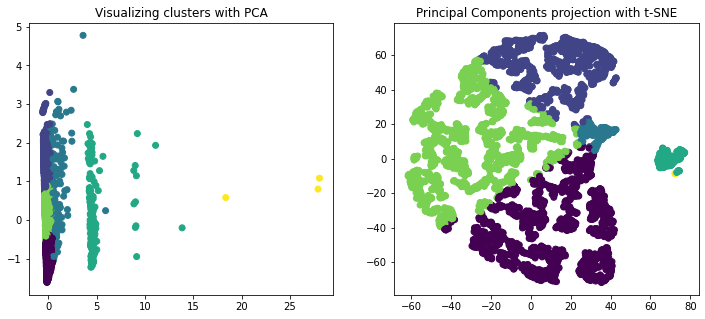

In [47]:
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=kmeans_cluster)

##### 2) Searching the best number of clusters K

In [61]:
nb_clusters = 15

In [62]:
inertia = {}

for num_clusters in range(2, nb_clusters + 1):
    #print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    random_state=0).fit(X_norm_sample) # verbose=0,
    # we add to the dict of inertia the inertia for the K-Means
    inertia[num_clusters] = kmeans_cluster.inertia_

In [64]:
#inertia

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

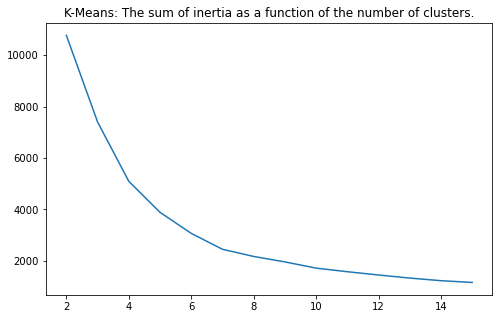

In [65]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

Conclusion :
K-Means minimizes the sum of inertia.
We can see an elbow for k = 5 so k = 5 seems like a good candidate with this metric.

##### Silhouette score

We want the silhouette score to be close to 1.


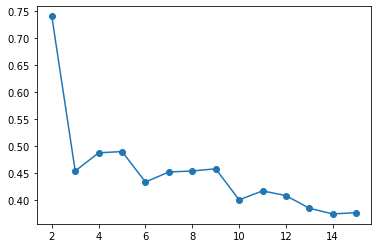

In [67]:
silhouettes = []

for num_clusters in range(2, nb_clusters + 1):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)

    silh = silhouette_score(X_norm_sample, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, nb_clusters + 1), silhouettes, marker='o')

Conclusion :
We want the silhouette score to be close to 1.
Here, k = 2 has the highest silhouette score but we need more clusters.
k = 3 to  k = 9 seem like good candidates.

##### Davies Bouldin score :
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

We want the silhouette score to be close to 1.


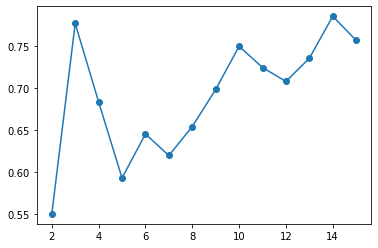

In [68]:
list_davies_bouldin = []

for num_clusters in range(2, nb_clusters + 1):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)

    db = davies_bouldin_score(X_norm_sample, cls.labels_)
    list_davies_bouldin.append(db)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, nb_clusters + 1), list_davies_bouldin, marker='o')

Conclusion :
The best number of clusters that minimizes the DB index is k = 2.
However, for our segmentation, we need more clusters, k = 5 looks like a good candidate with this metric.

#### 2) Real dataset X_norm

To evaluate the K-Means clustering we will use the elbow graph.
Computing scores like the silhouette score takes too much time.

##### Choosing the best value for K

In [69]:
nb_clusters = 15

In [71]:
inertia = {}

for num_clusters in range(1, nb_clusters + 1):
    #print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                            verbose=0,
                            random_state=0).fit(X_norm)
    inertia[num_clusters] = kmeans_cluster.inertia_

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

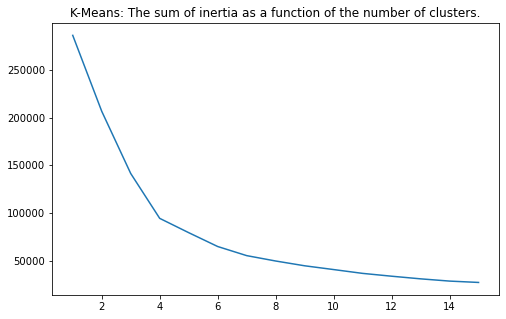

In [72]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

We have an elbow at K = 4
K = 4 or K = 5 seem like good candidates.

##### Choosing K = 4

In [98]:
best_kmeans = KMeans(n_clusters=4,
                            verbose=0,
                            random_state=0).fit(X_norm)

We display to PCA visualisation from above

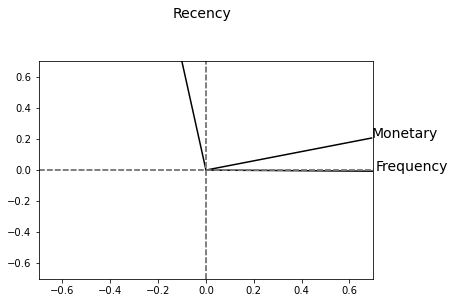

In [80]:
display_pca_components(pca, X_norm)

Text(0.5, 1.0, 'Visualizing clusters with PCA')

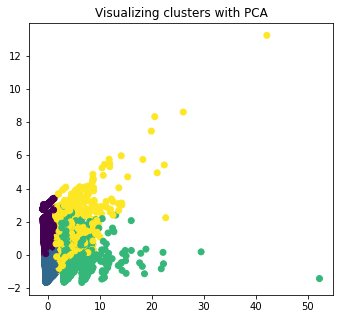

In [99]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=best_kmeans.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

In [100]:
# Saving clustering model
model = {'kmeans_rfm': best_kmeans}
filename = './model/kmeans_rfm.pkl'

with open(filename, "wb") as f: # wb writing
    pickle.dump(model, f)

##### Analysis

In [101]:
best_kmeans_dataset = dataset_rfm.copy()

# we add a column that puts each customer into a cluster
best_kmeans_dataset['Customer_cluster'] = best_kmeans.labels_ # best_kmeans_dataset['Customer_cluster'] = best_kmeans.predict(X_norm)
display(best_kmeans_dataset)

,customer_unique_id,Recency,Frequency,Monetary,Customer_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,0
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,0
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,1


In [146]:
print("We get the total number of customers per cluster.")
total_customers_per_cluster = best_kmeans_dataset[["Customer_cluster"]].value_counts()
total_customers_per_cluster

We get the total number of customers per cluster.


Customer_cluster
1                   51886
0                   38378
2                    2883
3                    2273
dtype: int64

In [147]:
print("We make a dataframe with the mean value per feature per cluster.")

avg_cluster = best_kmeans_dataset.groupby("Customer_cluster").agg(
    {
        'customer_unique_id': 'count',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
).rename(columns={'customer_unique_id': 'Nb customers',
                  'Recency': 'Avg Recency',
                  'Frequency': 'Avg Frequency',
                  'Monetary': 'Avg Monetary'})
avg_cluster

We make a dataframe with the mean value per feature per cluster.


,Nb customers,Avg Recency,Avg Frequency,Avg Monetary
Customer_cluster,,,,
0,38378,392.691438,1.000000,114.481193
1,51886,132.518810,1.000000,113.596573
2,2883,225.184530,2.114811,243.049823
3,2273,243.351518,1.014078,1145.314571


##### Analysing the total number of customers per cluster
We analyse the total number of customers per cluster

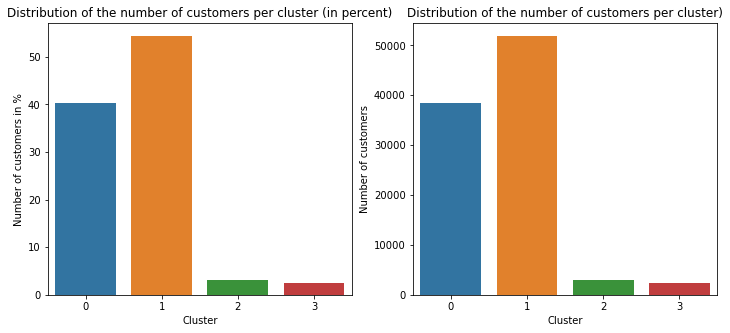

In [292]:
def display_barplot_total_customers(grouped_df):
    plt.figure(figsize=(12, 5))

    # Percentage
    ax = plt.subplot(1, 2, 1)
    plt.title('Distribution of the number of customers per cluster (in percent)')
    sns.barplot(x=grouped_df.index,
                y=grouped_df['Nb customers'] / grouped_df["Nb customers"].sum() * 100,
                ax=ax) # the index of the df represents the clusters
    plt.xlabel('Cluster')
    plt.ylabel("Number of customers in %")

    # Total number
    ax = plt.subplot(1, 2, 2)
    plt.title('Distribution of the number of customers per cluster)')
    sns.barplot(x=grouped_df.index,
                y=grouped_df['Nb customers'],
                ax=ax) # the index of the df represents the clusters
    plt.xlabel('Cluster')
    plt.ylabel("Number of customers")

display_barplot_total_customers(grouped_df=avg_cluster)

##### Analysing the clustering
We analyse the average Recency, Frequency and Monetary values per cluster

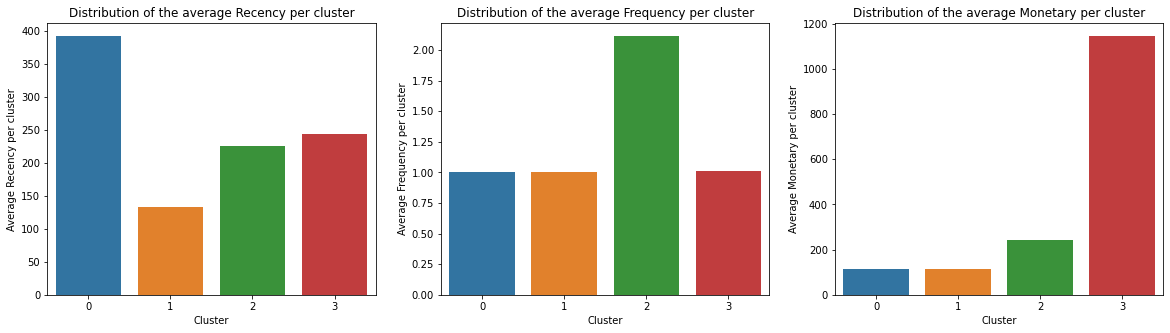

In [293]:
features_to_plot = ["Recency", "Frequency", "Monetary"]

display_barplot_avg_per_feature(df_grouped=avg_cluster, all_features=features_to_plot)

##### Display box plot per cluster and per feature

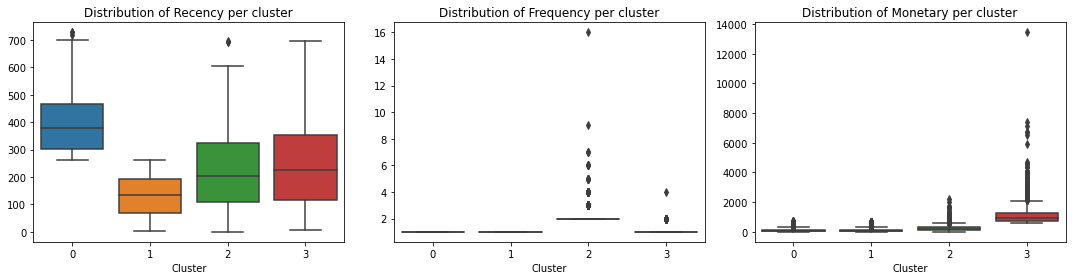

In [280]:
display_boxplot_per_feature(best_kmeans_dataset, all_features=features_to_plot, cluster_column_name="Customer_cluster")

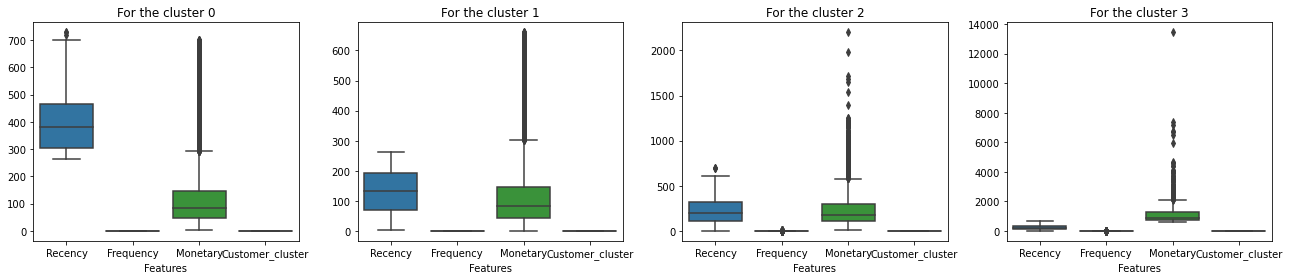

In [289]:
display_boxplot_per_cluster(best_kmeans_dataset, cluster_column_name="Customer_cluster")

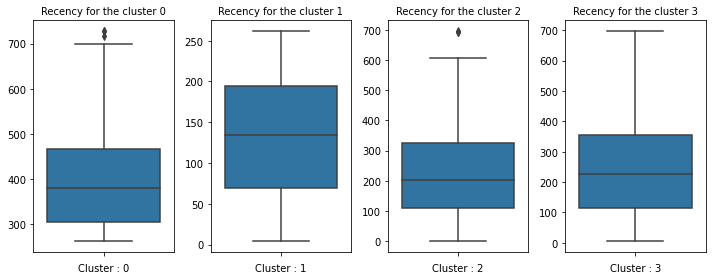

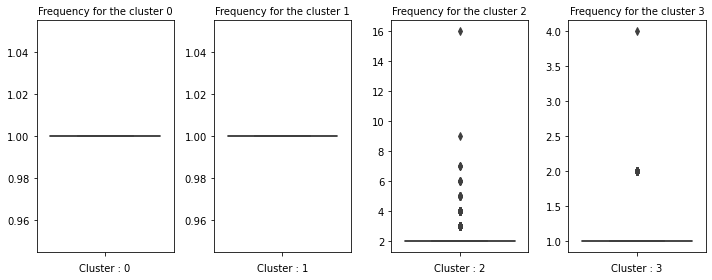

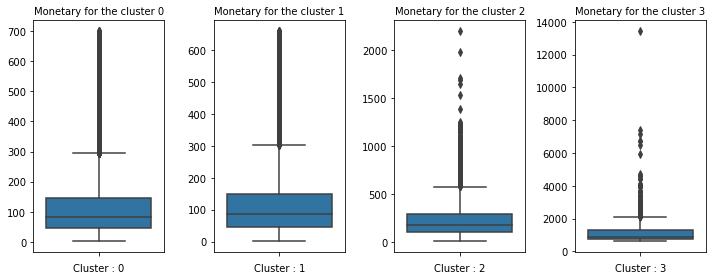

In [291]:
for feature in features_to_plot:
    display_boxplot_per_feature_per_cluster(best_kmeans_dataset, feature=feature, cluster_column_name="Customer_cluster")

##### Bivariate analysis (2D)

##### 3D representation of the clusters

Text(0.5, 0, 'Monetary')

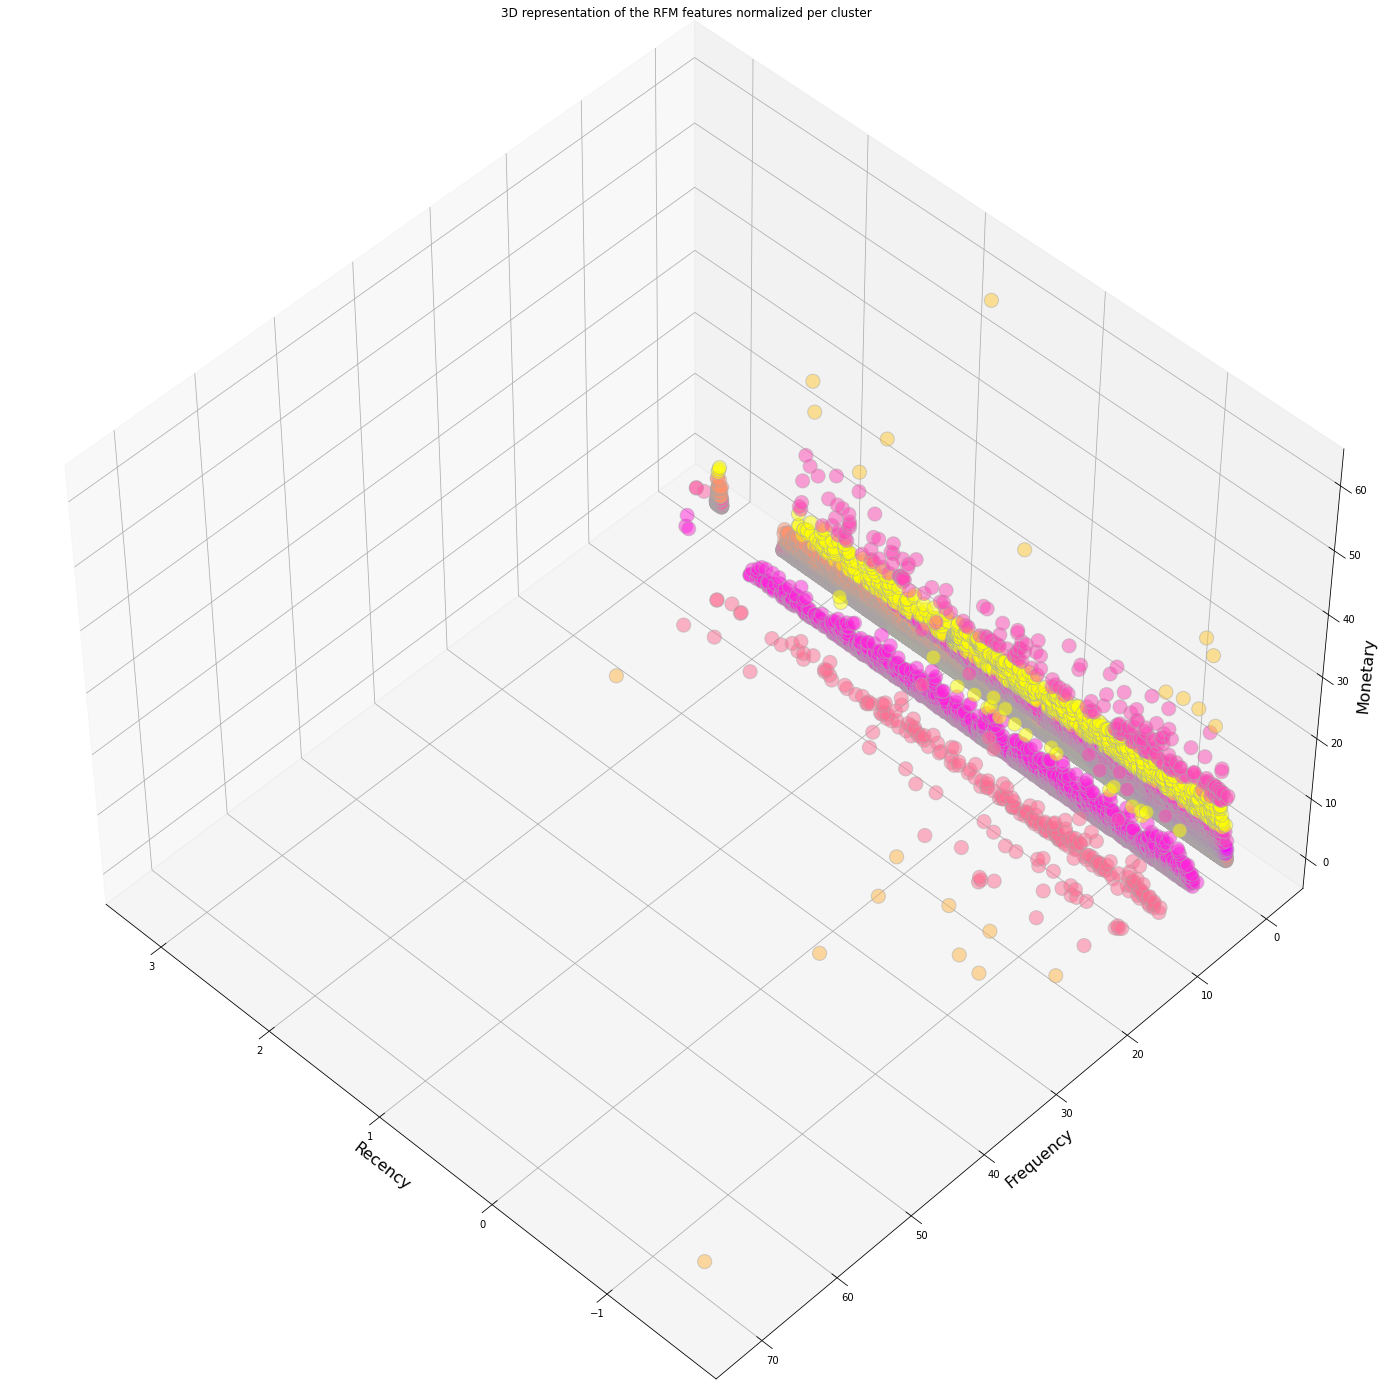

In [342]:
fig = plt.figure(figsize=(25, 25))
plt.clf()

ax = fig.add_subplot(111, projection='3d',#,
                     elev=48,
                     azim=134)
plt.cla()
ax.scatter(X_norm["Recency"], X_norm["Frequency"], X_norm["Monetary"],
           c=kmeans_cluster.labels_,
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey'
           )

ax.set_title("3D representation of the RFM features normalized per cluster")
ax.set_xlabel('Recency', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_zlabel('Monetary', fontsize=16)

Text(0.5, 0, 'Monetary')

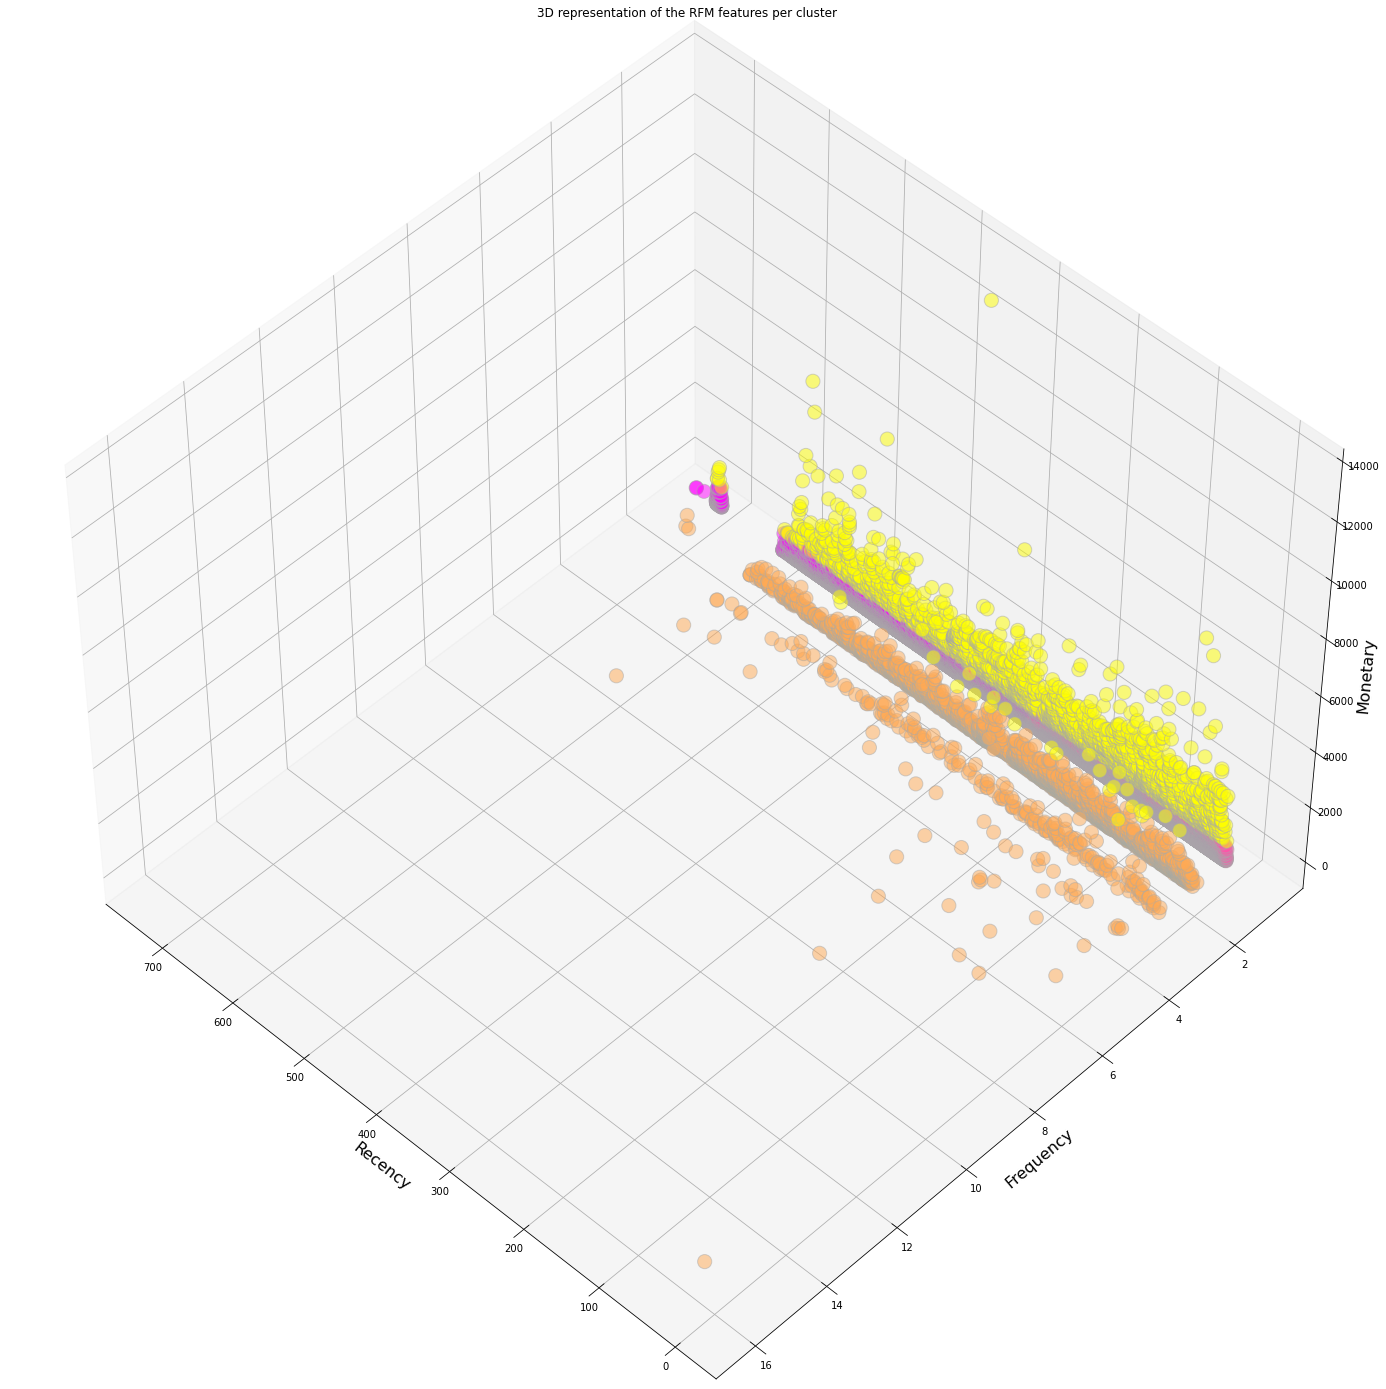

In [339]:
#plt.rcParams["figure.figsize"] = (25, 25)
fig = plt.figure(figsize=(25, 25))
plt.clf()

ax = fig.add_subplot(111, projection='3d',#,
                             elev=48,
                              azim=134)
plt.cla()
ax.scatter(best_kmeans_dataset["Recency"], best_kmeans_dataset["Frequency"], best_kmeans_dataset["Monetary"],

           c=best_kmeans_dataset["Customer_cluster"],
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey'
           )

ax.set_title("3D representation of the RFM features per cluster")
ax.set_xlabel('Recency', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_zlabel('Monetary', fontsize=16)

**Analysis**


	L’analyse des graphiques permet de formaliser un profil de clients par cluster, par exemple « cluster 0 = clients avec des montants élevés et une fréquence de commande élevée », etc.


	Cette analyse permet de valider que chaque cluster décrit une typologie de clients qui a du sens d’un point de vue métier (dans notre cas, pour séparer les clients plus ou moins intéressants), et qui est différente des autres clusters.

### 4) Segmentation : RFM Score (Giving a rank to each customer based on RFM using K-Means)

##### Clustering RFM variables using K-Means

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)

In [ ]:
rfm_columns = ['Recency','Frequency','Monetary']

In [ ]:
rfm_clustering = apply_kmeans_per_column(dataset_rfm, rfm_columns, kmeans_cluster, n_clusters=4)

In [ ]:
display(rfm_clustering)

##### Segmentation as a function of RFM criteria : getting ideas

In [ ]:
#rfm_clustering["RFM_score"] = rfm_clustering["Recency_cluster"] * 100 + rfm_clustering["Frequency_cluster"] * 10 + rfm_clustering["Monetary_cluster"]
rfm_clustering['RFM_score'] = rfm_clustering.Recency_cluster.astype(str) + rfm_clustering.Frequency_cluster.astype(str) + rfm_clustering.Monetary_cluster.astype(str)

display(rfm_clustering)

In [ ]:
rfm_clustering[["RFM_score"]].value_counts()

In [ ]:
print("We have {} combinaisons possible here.".format(rfm_clustering["RFM_score"].nunique()))

n_clusters = 4
rfm_variables = 3
print("In theory, we would have {} combinaisons.".format(n_clusters ** rfm_variables))

In [ ]:
data = rfm_clustering['RFM_score']

fig = plt.figure(figsize=(12, 5))
data.value_counts().plot(kind='bar');

##### Specifying each cluster with describe

In [ ]:
description_clustering = rfm_clustering.copy()

for i, rfm_variable in enumerate(["Recency", "Frequency", "Monetary"]):
    for j, rfm_cluster in enumerate(["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]):
        if i == j:
            display(description_clustering[[rfm_cluster, rfm_variable]].groupby(rfm_cluster).describe())

In [ ]:
recency_dict = {
    0: "two_years_ago_",
    1: "last_year_",
    2: "4-6_months_ago_",
    3: "0_4_months_ago_"
}

frequency_dict = {
    0: "1_order_",
    1: "2_orders_",
    2: "3_to_4_orders_",
    3: "more_than_5_orders_"
}

# 1 euro = 0.2 BRL
monetary_dict = {
    0: "up_to_176_BRL",
    1: "up_to_551_BRL",
    2: "up_to_1521_BRL",
    3: "up_to_13440_BRL"
}

##### Segmentation

In [ ]:
rfm_clustering['Classification'] = 'none'

#filter_ = (rfm_clustering['Classification'] == 'none')

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 2) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0) # bought once
                   & (rfm_clustering['Classification'] == 'none'), # so that we won't over write classification
                   'Classification'] = recency_dict[2]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)
                    & (rfm_clustering['Classification'] == 'none'), # bought once
                   'Classification'] = recency_dict[3]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 1) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none') ,
                   'Classification'] = recency_dict[0]  + frequency_dict[0] + monetary_dict[0]


#Lowest-spending only_bought_once customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) & # bought recently or not sooo long ago
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought once
                   (rfm_clustering['Monetary_cluster'] <= 1)  # bought cheap stuff
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[1]


In [ ]:
#Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
              & (rfm_clustering['Monetary_cluster'] == 3)#, #
                & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'top_customer'

#High-spending New Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) &
              (rfm_clustering['Frequency_cluster'] == 0) &
              (rfm_clustering['Monetary_cluster'] == 3)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'high_spending_new_customer'

#Lowest-spending active loyal customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] != 0) &
                   (rfm_clustering['Frequency_cluster'] > 0) &
              (rfm_clustering['Monetary_cluster'] < 2)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'low_spending_loyal_customer'

#Churned Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
              & (rfm_clustering['Frequency_cluster'] > 1)
                   & (rfm_clustering['Monetary_cluster'] == 3) #, #
                   & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'churned_top_customer'

In [ ]:
data = rfm_clustering['Classification']

data.value_counts()

In [ ]:
data.value_counts().plot(kind='bar');

In [ ]:
print("To get a segmentation idea")
rfm_clustering[rfm_clustering['Classification'] == 'none']

### 5) Customer Personas

https://ironfocus.com/blog/rfm-analysis-how-to-increase-your-sales/

In [ ]:
personas = {
    "Brand Champion": {"R": 3, "F": 3, "M": 3},
    "Loyal Customers": {"R": 3, "F": 3, "M": 2},

    "Possibly Alienated_1": {"R": 0, "F": 2, "M": None},
    "Possibly Alienated_2": {"R": 0, "F": 3, "M": None},

    "Possibly Alienated_3": {"R": 1, "F": 2, "M": None},
    "Possibly Alienated_4": {"R": 1, "F": 3, "M": None},

    "New Customers": {"R": 3, "F": 0, "M": None},
    "One-off big spenders": {"R": 0, "F": 0, "M": 3},
    "Expired leads": {"R": 0, "F": 0, "M": 0},
}

In [ ]:
rfm_clustering['Persona'] = 'none'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Brand Champion'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 2)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Loyal Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & ((rfm_clustering['Frequency_cluster'] == 2) | (rfm_clustering['Frequency_cluster'] == 3))
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Possibly Alienated'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'New Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'One-off big spenders'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Expired leads'

In [ ]:
data = rfm_clustering['Persona']

data.value_counts()

In [ ]:
data.value_counts().plot(kind='bar');

In [343]:
# End of try-outs time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 15292.194189 sec
computing time : 04:14:52
